## HW4 Answers
*Ex 1*: Download the NER CONLL2003 dataset and code for HW4 from moodle.
 - 1.1 Check the output of the function read_conll, what is the vocabulary size?
 - 1.2 What is the label dictionary size?
 - 1.3 How many sentences do you have?
 - 1.4 What is the most frequent word over all sentences?

In [1]:
#inputs
from HW4 import *

In [86]:
# Exercise 1.1
# check first the return and the input of the function
read_conll??

In [44]:
# the input is a file -> let's try the train.txt file
# the outputs are the stripped sentences, a word vocabulary and a label vocabulary
file = "train.txt"
folder = "CONLL2003"
sentences, word_vocab, label_vocab = read_conll(filename=folder+"/"+file)

In [45]:
print(type(word_vocab))
print(type(label_vocab))
print(type(sentences))

<class 'utils.stringdict'>
<class 'utils.stringdict'>
<class 'list'>



word_vocab is an instance of the custom class stringdict. The function len() should get us the length of the word_vocab dictionary, which should correspond to the vocabulary size.


In [46]:
print("The function read_conll outputs for the file: {}  a word vocabulary of size: {}.".format(file,word_vocab.len))

The function read_conll outputs for the file: train.txt  a word vocabulary of size: 23624.


In [47]:
# Exercise 1.2
# same topic here just for the label vocab
label_vocab

In [48]:
print("The function read_conll outputs for the file: {}  a label vocabulary of size: {}.".format(file,label_vocab.len))

The function read_conll outputs for the file: train.txt  a label vocabulary of size: 10.


In [49]:
# Exercise 1.3
# each sentence is a custom type Sequence, however they are outputed in a list
print("The function read_conll outputs for the file: {} {} number of sentences.".format(file,len(sentences)))

The function read_conll outputs for the file: train.txt 14040 number of sentences.


In [65]:
# Exercise 1.4
# in order to get the most frequent word one approach would be to concatenate
# all x values from each sentence and return the mode
all_sentences = [sentence.x for sentence in sentences ]

# flatten
all_words = [word for sentence in all_sentences for word in sentence]

In [69]:
# using the scipy.stats library to compute the mode
from scipy.stats import mode
frequent_word = mode(all_words)

In [77]:
print("The most frequent sign is: {} and it occurs {} times.".format(word_vocab.get_word(int(frequent_word[0])), int(frequent_word[1])))

The most frequent sign is: . and it occurs 7374 times.


__Apparently the Stop sign . is the most frequent "word" in the sentences. Probably the label tags could help.__

In [83]:
# all possible label names
print(label_vocab.names)

['unk', 'B-ORG', 'O', 'B-MISC', 'B-PER', 'I-PER', 'B-LOC', 'I-ORG', 'I-MISC', 'I-LOC']


In [93]:
#check for the tag of the . sign
label_vocab.get_word(word_vocab.get_id("."))

'I-LOC'

##### As these Labels are very unclear a look into the research paper:


*"Each line contains four fields: the word, its part-of-speech tag, its chunk tag and its named entitytag. Words tagged with O are outside of named en-tities and the I-XXX tag is used for words inside anamed entity of type XXX. Whenever two entities oftype XXX are immediately next to each other, thefirst word of the second entity will be tagged B-XXXin order to show that it starts another entity. Thedata contains entities of four types: persons (PER),organizations (ORG), locations (LOC) and miscel-laneous names (MISC). This tagging scheme is theIOB scheme originally put forward by Ramshaw and Marcus (1995)."* 


(Erik F. Tjong Kim Sang and Fien De Meulder, 2003, http://aclweb.org/anthology/W03-0419)


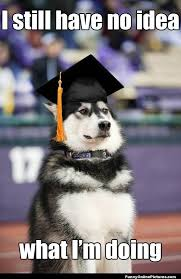